In [66]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [67]:
raw_data=pd.read_csv("data/raw_data/train.csv")
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27071 entries, 0 to 27070
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               27071 non-null  object 
 1   is_appartment    27071 non-null  bool   
 2   area             24301 non-null  float64
 3   added_time       27071 non-null  int64  
 4   bedrooms         27071 non-null  float64
 5   new_building     27071 non-null  int64  
 6   postcode         27071 non-null  int64  
 7   lat              26434 non-null  float64
 8   lon              26434 non-null  float64
 9   advertiser       26736 non-null  object 
 10  foto_amount      27071 non-null  float64
 11  is_promoted      27071 non-null  int64  
 12  subtype          26985 non-null  object 
 13  sticker          3692 non-null   object 
 14  price_drop_date  2190 non-null   object 
 15  energy_value     19731 non-null  float64
 16  energy_label     21065 non-null  object 
 17  province    

,id,is_appartment,area,added_time,bedrooms,new_building,postcode,lat,lon,advertiser,foto_amount,is_promoted,subtype,sticker,price_drop_date,energy_value,energy_label,province,price
0,tr0,True,88.0,141725167,2.0,0,8300,51.342160,3.287791,Vastio,12.0,1,Appartement,NaN,NaN,210.0,c,West-Vlaanderen,599000.0
1,tr1,True,55.0,132223171,1.0,0,1800,50.933980,4.436390,Ring Consult,10.0,1,Appartement,NaN,NaN,92.0,a,Vlaams-Brabant,199000.0
2,tr2,False,333.0,119151262,4.0,0,3294,50.996456,5.045376,Hillewaere Heist-op-den-Berg,30.0,1,Villa,NaN,2024-06-08 23:29:39,NaN,f,Vlaams-Brabant,875000.0
3,tr3,False,517.0,137313038,5.0,0,1700,50.843364,4.274004,Living Stone Dilbeek,31.0,1,Eengezinswoning,NaN,NaN,322.0,d,Vlaams-Brabant,649000.0
4,tr4,True,99.0,137303955,3.0,0,8300,51.348180,3.276942,Colpin Heist,13.0,1,Appartement,NaN,NaN,161.0,b,West-Vlaanderen,765000.0


In [68]:
train_data = pd.read_csv("train_preprocessed_wo_distance.csv")
train_data = train_data.merge(raw_data[["id", "bedrooms"]], on="id", how="left")
train_data = train_data[train_data['id'] != 'tr14706']
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 21655 entries, 0 to 21655
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21655 non-null  object 
 1   is_appartment           21655 non-null  bool   
 2   area                    21655 non-null  float64
 3   added_time              21655 non-null  int64  
 4   new_building            21655 non-null  int64  
 5   lat                     21655 non-null  float64
 6   lon                     21655 non-null  float64
 7   foto_amount             21655 non-null  float64
 8   energy_value            21655 non-null  float64
 9   energy_label            21655 non-null  object 
 10  province                21655 non-null  object 
 11  price                   21655 non-null  float64
 12  bedroom_category        21655 non-null  object 
 13  had_price_drop          21655 non-null  int64  
 14  subtype_category        21655 non-null  obj

,id,is_appartment,area,added_time,new_building,lat,lon,foto_amount,energy_value,energy_label,...,bedroom_category,had_price_drop,subtype_category,postcode_first_digit,postcode_middle_digits,postcode_last_digit,advertiser_category,foto_category,is_sticker,bedrooms
0,tr6148,False,233.00,137834664,0,50.379080,4.856770,9.0,639.0,F,...,Standard (2-4 Beds),0,Single-Family Home,5,17,0,Well-Known,Normal (3-30),0,4.0
1,tr5883,True,70.00,119647464,0,51.005499,5.465612,26.0,378.0,D,...,Standard (2-4 Beds),0,Apartment,3,53,0,Unknown,Normal (3-30),0,2.0
2,tr15811,False,98.00,142400917,0,50.925874,2.746209,32.0,641.0,F,...,Standard (2-4 Beds),0,Single-Family Home,8,64,0,Unknown,High (>30),0,2.0
3,tr14176,False,253.00,142304561,0,50.901116,4.558339,30.0,298.0,C,...,Large (5-8 Beds),0,Villa,3,7,1,Unknown,Normal (3-30),0,5.0
4,tr15203,False,208.03,134291628,0,50.163738,5.042059,26.0,480.0,F,...,Large (5-8 Beds),0,Single-Family Home,5,56,3,Known,Normal (3-30),0,5.0


In [69]:
train_data=train_data.drop(columns=['postcode_last_digit'])

train_data["area"]=train_data["area"].astype(int)
train_data.loc[(train_data["bedrooms"] == 0) & (75 > train_data["area"]) & (train_data["area"]> 50), "bedrooms"] = 1
train_data.loc[(train_data["bedrooms"] == 0) & (125 > train_data["area"]) & (train_data["area"]> 75), "bedrooms"] = 2
train_data.loc[(train_data["bedrooms"] == 0) & (train_data["area"] > 125), "bedrooms"] = 3


train_data["sqm_per_bedroom"]=train_data["area"]/(train_data["bedrooms"]+1)
train_data.head()

,id,is_appartment,area,added_time,new_building,lat,lon,foto_amount,energy_value,energy_label,...,bedroom_category,had_price_drop,subtype_category,postcode_first_digit,postcode_middle_digits,advertiser_category,foto_category,is_sticker,bedrooms,sqm_per_bedroom
0,tr6148,False,233,137834664,0,50.379080,4.856770,9.0,639.0,F,...,Standard (2-4 Beds),0,Single-Family Home,5,17,Well-Known,Normal (3-30),0,4.0,46.600000
1,tr5883,True,70,119647464,0,51.005499,5.465612,26.0,378.0,D,...,Standard (2-4 Beds),0,Apartment,3,53,Unknown,Normal (3-30),0,2.0,23.333333
2,tr15811,False,98,142400917,0,50.925874,2.746209,32.0,641.0,F,...,Standard (2-4 Beds),0,Single-Family Home,8,64,Unknown,High (>30),0,2.0,32.666667
3,tr14176,False,253,142304561,0,50.901116,4.558339,30.0,298.0,C,...,Large (5-8 Beds),0,Villa,3,7,Unknown,Normal (3-30),0,5.0,42.166667
4,tr15203,False,208,134291628,0,50.163738,5.042059,26.0,480.0,F,...,Large (5-8 Beds),0,Single-Family Home,5,56,Known,Normal (3-30),0,5.0,34.666667


<Axes: >

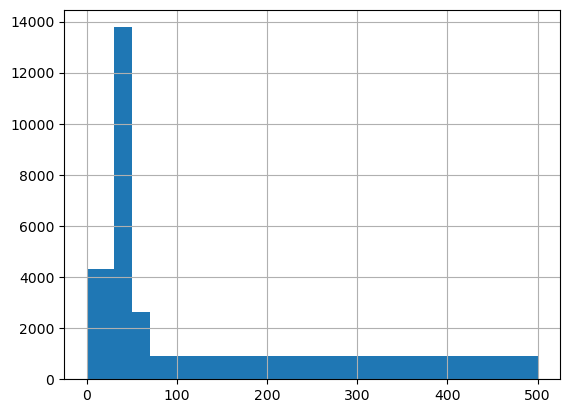

In [70]:
train_data.loc[train_data["id"]=="tr14706", "sqm_per_bedroom"] = 500
train_data["sqm_per_bedroom"].hist(bins=[0,30,50,70,500])

In [71]:
train_data['sqm_per_bedroom_bin'] = pd.cut(train_data['sqm_per_bedroom'], bins=[0, 30, 50, 70, float('inf')], labels=["Small","Average","Large","Extreme"])
train_data=train_data.drop(columns="bedrooms")
train_data.head()

,id,is_appartment,area,added_time,new_building,lat,lon,foto_amount,energy_value,energy_label,...,bedroom_category,had_price_drop,subtype_category,postcode_first_digit,postcode_middle_digits,advertiser_category,foto_category,is_sticker,sqm_per_bedroom,sqm_per_bedroom_bin
0,tr6148,False,233,137834664,0,50.379080,4.856770,9.0,639.0,F,...,Standard (2-4 Beds),0,Single-Family Home,5,17,Well-Known,Normal (3-30),0,46.600000,Average
1,tr5883,True,70,119647464,0,51.005499,5.465612,26.0,378.0,D,...,Standard (2-4 Beds),0,Apartment,3,53,Unknown,Normal (3-30),0,23.333333,Small
2,tr15811,False,98,142400917,0,50.925874,2.746209,32.0,641.0,F,...,Standard (2-4 Beds),0,Single-Family Home,8,64,Unknown,High (>30),0,32.666667,Average
3,tr14176,False,253,142304561,0,50.901116,4.558339,30.0,298.0,C,...,Large (5-8 Beds),0,Villa,3,7,Unknown,Normal (3-30),0,42.166667,Average
4,tr15203,False,208,134291628,0,50.163738,5.042059,26.0,480.0,F,...,Large (5-8 Beds),0,Single-Family Home,5,56,Known,Normal (3-30),0,34.666667,Average


<Axes: >

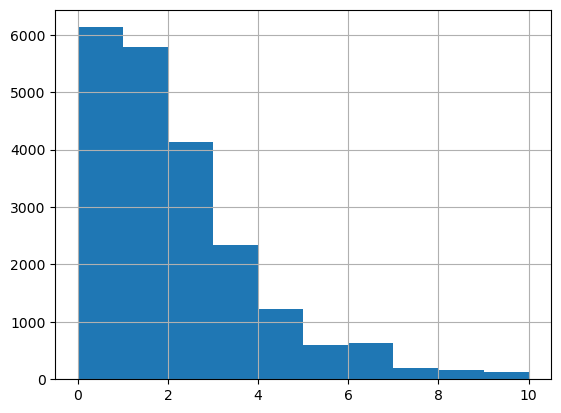

In [72]:
train_data["energy_per_sqm"]=train_data["energy_value"]/train_data["area"]
train_data.head()
train_data["energy_per_sqm"].hist(bins=[0,1,2,3,4,5,6,7,8,9,10])

<Axes: >

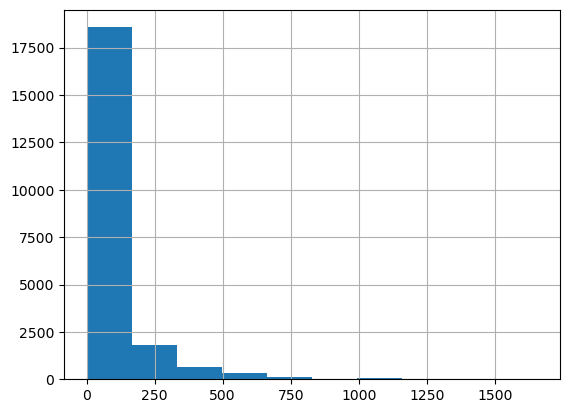

In [73]:
train_data['days_since_added'] = (train_data['added_time'].max() - train_data['added_time']) / (60 * 60 * 24)
train_data=train_data.drop(columns=["added_time"])
train_data["days_since_added"].hist()

In [74]:
train_data['energy_label_numeric'] = train_data['energy_label'].map({'A+':0,'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7 })
train_data=train_data.drop(columns=["energy_label","foto_amount"])

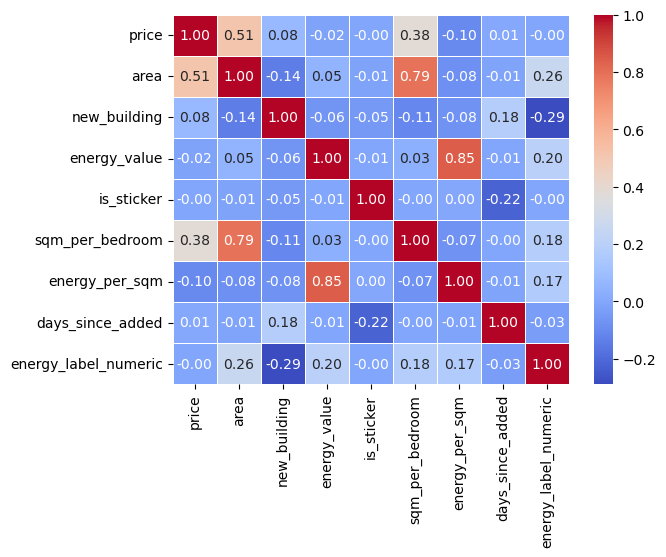

In [75]:
numeric_features = ['price','area', 'new_building', 'energy_value', 'is_sticker','sqm_per_bedroom','energy_per_sqm','days_since_added','energy_label_numeric']
numerical_data = train_data[numeric_features]
correlation_matrix = numerical_data.corr()
correlation_matrix_spearman= numerical_data.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

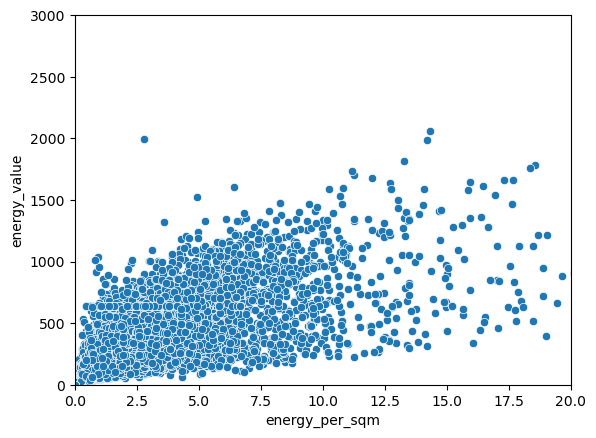

In [76]:
sns.scatterplot(x='energy_per_sqm', y='energy_value', data=train_data)
plt.xlim(0, 20)
plt.ylim(0, 3000) 
plt.show()

In [77]:
subtype_frequency = train_data['subtype_category'].value_counts()
train_data['subtype_freq'] = train_data['subtype_category'].map(subtype_frequency)
train_data.head()

,id,is_appartment,area,new_building,lat,lon,energy_value,province,price,bedroom_category,...,postcode_middle_digits,advertiser_category,foto_category,is_sticker,sqm_per_bedroom,sqm_per_bedroom_bin,energy_per_sqm,days_since_added,energy_label_numeric,subtype_freq
0,tr6148,False,233,0,50.379080,4.856770,639.0,Namen,585502.0,Standard (2-4 Beds),...,17,Well-Known,Normal (3-30),0,46.600000,Average,2.742489,62.028461,6,11293
1,tr5883,True,70,0,51.005499,5.465612,378.0,Limburg,89000.0,Standard (2-4 Beds),...,53,Unknown,Normal (3-30),0,23.333333,Small,5.400000,272.528461,4,8027
2,tr15811,False,98,0,50.925874,2.746209,641.0,West-Vlaanderen,95000.0,Standard (2-4 Beds),...,64,Unknown,High (>30),0,32.666667,Average,6.540816,9.178310,6,11293
3,tr14176,False,253,0,50.901116,4.558339,298.0,Vlaams-Brabant,959000.0,Large (5-8 Beds),...,7,Unknown,Normal (3-30),0,42.166667,Average,1.177866,10.293542,3,764
4,tr15203,False,208,0,50.163738,5.042059,480.0,Namen,340000.0,Large (5-8 Beds),...,56,Known,Normal (3-30),0,34.666667,Average,2.307692,103.035822,6,11293


In [78]:
rfm_features = train_data[['days_since_added', 'subtype_freq', 'area']].copy()

scaler = RobustScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

kmeans = KMeans(n_clusters=5, random_state=1020733)
train_data['rfm_cluster'] = kmeans.fit_predict(rfm_scaled)
kmeans.fit(rfm_scaled)


train_data['rfm_cluster'].value_counts()

rfm_cluster
0    9120
2    8111
3    2135
4    2034
1     255
Name: count, dtype: int64

In [79]:
subtype_frequency

subtype_category
Single-Family Home      11293
Apartment                8027
Villa                     764
Studio                    467
Mixed-Use/Commercial      390
Luxury Home               247
Bungalow/Chalet           206
Farmhouse/Rural           164
Other/Unknown              87
Unique Properties          10
Name: count, dtype: int64

In [80]:
cluster_description=train_data[['area','days_since_added','subtype_freq','rfm_cluster']].groupby('rfm_cluster')
cluster_description.describe()

area                                                       \
              count        mean         std    min     25%    50%    75%   
rfm_cluster                                                                
0            9120.0  200.859320   84.415498  118.0  155.00  180.0  220.0   
1             255.0  150.474510  116.836274   34.0   92.50  119.0  180.0   
2            8111.0   95.973863   26.541349    6.0   80.00   96.0  110.0   
3            2135.0  215.870258  148.020245   17.0   98.00  200.0  286.0   
4            2034.0  142.710423   79.199507   11.0   94.25  125.0  170.0   

                    days_since_added              ...               \
                max            count        mean  ...          75%   
rfm_cluster                                       ...                
0            1688.0           9120.0   53.254295  ...    77.999870   
1            1405.0            255.0  987.654779  ...  1128.248356   
2             186.0           8111.0   51.322053  ...    77.050330   
3            1250.0           2135.0   68.451323  ...    96.171053   
4            1380.0           2034.0  358.837263  ...   435.409363   

                         subtype_freq                                     \
                     max        count          mean          std     min   
rfm_cluster                                                                
0             359.080243       9120.0  11197.025439   551.611425  8027.0   
1            1657.337072        255.0   7478.070588  4120.984674    10.0   
2             212.218333       8111.0   8607.640118  1248.767368  8027.0   
3             419.020949       2135.0    470.114286   234.598467    10.0   
4             676.818935       2034.0   8953.997050  2808.451955    10.0   

                                                 
                 25%      50%      75%      max  
rfm_cluster                                      
0            11293.0  11293.0  11293.0  11293.0  
1             8027.0   8027.0  11293.0  11293.0  
2             8027.0   8027.0   8027.0  11293.0  
3              247.0    467.0    764.0    764.0  
4             8027.0   8027.0  11293.0  11293.0  

[5 rows x 24 columns]

In [81]:
train_data['rfm_cluster'] = train_data['rfm_cluster'].astype(int)
train_data['rfm_cluster'] = train_data['rfm_cluster'].map({
    0: 'Single-Family Homes',
    1: 'More years on the market',
    2: 'Apartments, smaller properties, fresh on the market',
    3: 'Huge areas - Villas',
    4: 'A year on the market'})
train_data.head()

,id,is_appartment,area,new_building,lat,lon,energy_value,province,price,bedroom_category,...,advertiser_category,foto_category,is_sticker,sqm_per_bedroom,sqm_per_bedroom_bin,energy_per_sqm,days_since_added,energy_label_numeric,subtype_freq,rfm_cluster
0,tr6148,False,233,0,50.379080,4.856770,639.0,Namen,585502.0,Standard (2-4 Beds),...,Well-Known,Normal (3-30),0,46.600000,Average,2.742489,62.028461,6,11293,Single-Family Homes
1,tr5883,True,70,0,51.005499,5.465612,378.0,Limburg,89000.0,Standard (2-4 Beds),...,Unknown,Normal (3-30),0,23.333333,Small,5.400000,272.528461,4,8027,A year on the market
2,tr15811,False,98,0,50.925874,2.746209,641.0,West-Vlaanderen,95000.0,Standard (2-4 Beds),...,Unknown,High (>30),0,32.666667,Average,6.540816,9.178310,6,11293,"Apartments, smaller properties, fresh on the m..."
3,tr14176,False,253,0,50.901116,4.558339,298.0,Vlaams-Brabant,959000.0,Large (5-8 Beds),...,Unknown,Normal (3-30),0,42.166667,Average,1.177866,10.293542,3,764,Huge areas - Villas
4,tr15203,False,208,0,50.163738,5.042059,480.0,Namen,340000.0,Large (5-8 Beds),...,Known,Normal (3-30),0,34.666667,Average,2.307692,103.035822,6,11293,Single-Family Homes


In [82]:
train_data_encoded = pd.get_dummies(train_data, columns=['rfm_cluster'], prefix='cluster')
train_data_encoded['cluster_A year on the market'] = train_data_encoded['cluster_A year on the market'].astype(int)
train_data_encoded['cluster_Apartments, smaller properties, fresh on the market'] = train_data_encoded['cluster_Apartments, smaller properties, fresh on the market'].astype(int)
train_data_encoded['cluster_Huge areas - Villas'] = train_data_encoded['cluster_Huge areas - Villas'].astype(int)
train_data_encoded['cluster_More years on the market'] = train_data_encoded['cluster_More years on the market'].astype(int)
train_data_encoded['cluster_Single-Family Homes'] = train_data_encoded['cluster_Single-Family Homes'].astype(int)
train_data_encoded.head()

,id,is_appartment,area,new_building,lat,lon,energy_value,province,price,bedroom_category,...,sqm_per_bedroom_bin,energy_per_sqm,days_since_added,energy_label_numeric,subtype_freq,cluster_A year on the market,"cluster_Apartments, smaller properties, fresh on the market",cluster_Huge areas - Villas,cluster_More years on the market,cluster_Single-Family Homes
0,tr6148,False,233,0,50.379080,4.856770,639.0,Namen,585502.0,Standard (2-4 Beds),...,Average,2.742489,62.028461,6,11293,0,0,0,0,1
1,tr5883,True,70,0,51.005499,5.465612,378.0,Limburg,89000.0,Standard (2-4 Beds),...,Small,5.400000,272.528461,4,8027,1,0,0,0,0
2,tr15811,False,98,0,50.925874,2.746209,641.0,West-Vlaanderen,95000.0,Standard (2-4 Beds),...,Average,6.540816,9.178310,6,11293,0,1,0,0,0
3,tr14176,False,253,0,50.901116,4.558339,298.0,Vlaams-Brabant,959000.0,Large (5-8 Beds),...,Average,1.177866,10.293542,3,764,0,0,1,0,0
4,tr15203,False,208,0,50.163738,5.042059,480.0,Namen,340000.0,Large (5-8 Beds),...,Average,2.307692,103.035822,6,11293,0,0,0,0,1


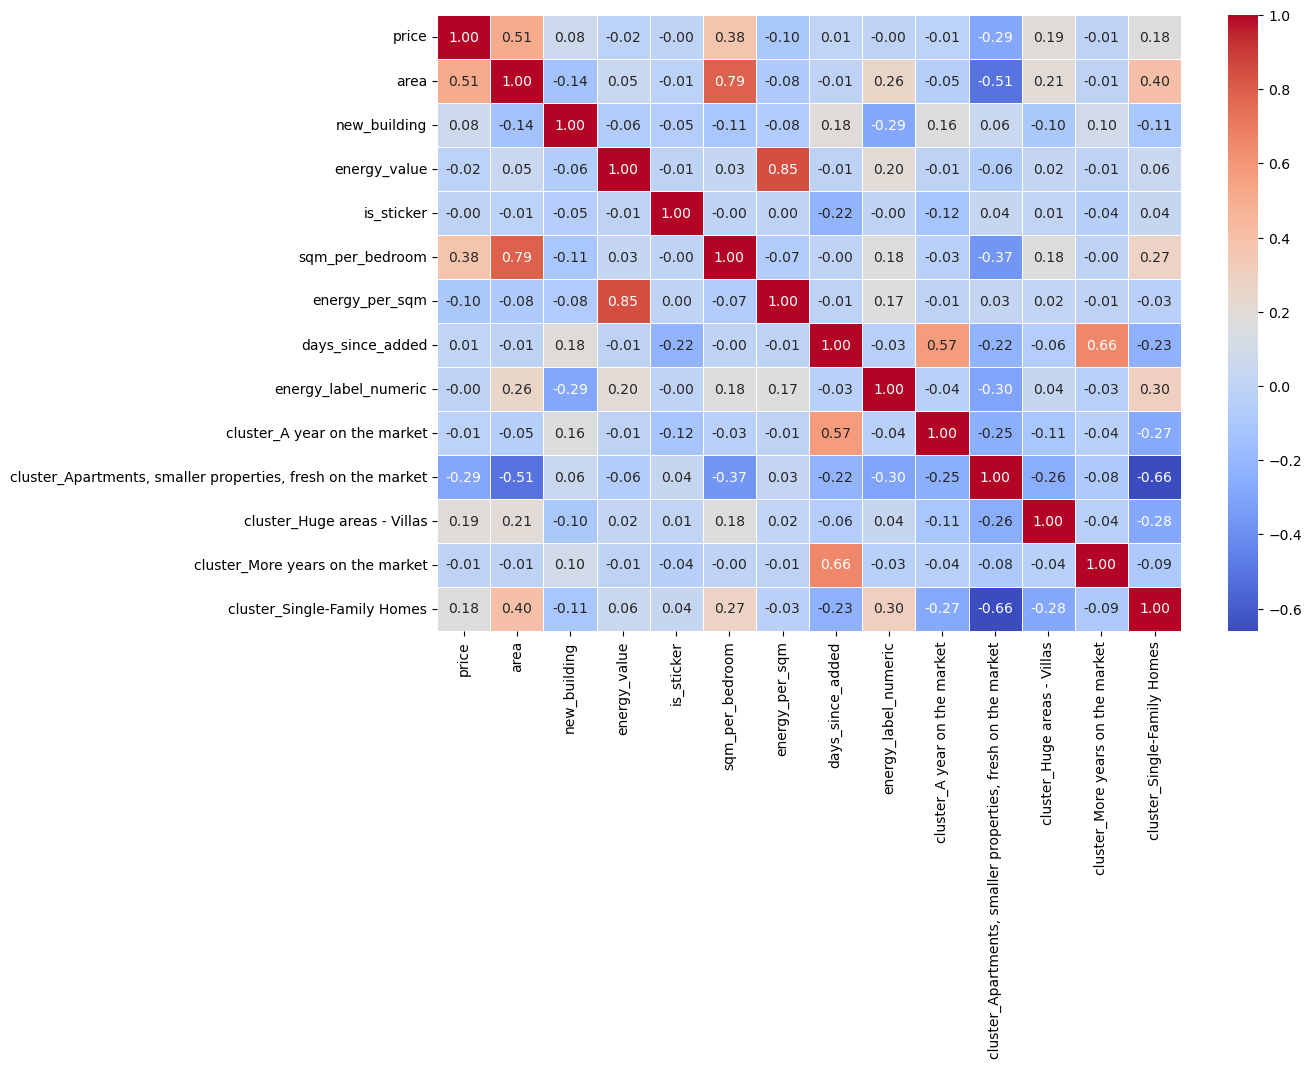

In [83]:
numeric_features = ['price','area', 'new_building', 'energy_value', 'is_sticker','sqm_per_bedroom','energy_per_sqm','days_since_added','energy_label_numeric','cluster_A year on the market','cluster_Apartments, smaller properties, fresh on the market','cluster_Huge areas - Villas','cluster_More years on the market','cluster_Single-Family Homes']
numerical_data = train_data_encoded[numeric_features]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [84]:
test_data=pd.read_csv("test_wprice_temporary.csv")
test_data.head()

,id,is_appartment,area,new_building,lat,lon,energy_value,province,price,bedroom_category,...,postcode_middle_digits,advertiser_category,foto_category,is_sticker,sqm_per_bedroom,sqm_per_bedroom_bin,energy_per_sqm,days_since_added,energy_label_numeric,subtype_freq
0,tr10108,False,117.0,0,50.838374,2.978333,786.0,West-Vlaanderen,135000.0,Standard (2-4 Beds),...,98,Known,Normal (3-30),1,39.000000,Average,6.717949,27.511516,6,11294
1,tr26943,False,240.0,0,51.187730,4.169153,639.0,Oost-Vlaanderen,575000.0,Standard (2-4 Beds),...,10,Known,Normal (3-30),0,60.000000,Large,2.662500,24.950741,6,11294
2,tr5038,True,38.0,1,50.834768,4.362186,170.0,Hoofdstedelijk Gewest Brussel,307000.0,Studio/1-Bed,...,5,Rare,Normal (3-30),0,38.000000,Average,4.473684,287.893472,4,467
3,tr3548,False,228.0,0,51.165780,4.989530,341.0,Antwerpen,274000.0,Large (5-8 Beds),...,44,Known,Normal (3-30),1,32.571429,Average,1.495614,6.037731,4,11294
4,tr25817,False,163.0,0,50.791683,3.095497,616.0,West-Vlaanderen,359000.0,Standard (2-4 Beds),...,93,Rare,Normal (3-30),0,40.750000,Average,3.779141,95.964259,6,11294


In [85]:
rfm_features_test = test_data[['days_since_added', 'subtype_freq', 'area']].copy()

# Scale the features
scaler = RobustScaler()
rfm_scaled_test = scaler.fit_transform(rfm_features_test)
test_data['rfm_cluster']=kmeans.predict(rfm_scaled_test)
test_data['rfm_cluster'] = test_data['rfm_cluster'].astype(int)
test_data['rfm_cluster'].value_counts()

rfm_cluster
0    2354
2    2006
4     504
3     489
1      62
Name: count, dtype: int64

In [86]:
test_data[['area','days_since_added','subtype_freq','rfm_cluster']].groupby('rfm_cluster').describe()

area                                                       \
              count        mean         std     min    25%    50%    75%   
rfm_cluster                                                                
0            2354.0  196.333356   67.826338  120.00  155.0  177.0  217.0   
1              62.0  145.490806   96.868927   40.08   94.5  132.5  160.7   
2            2006.0   95.234581   25.765792   16.00   79.0   96.0  110.0   
3             489.0  217.650920  152.268666   15.00   98.0  200.0  288.0   
4             504.0  142.832063   79.720173   32.00   94.0  123.5  167.6   

                   days_since_added              ...               \
               max            count        mean  ...          75%   
rfm_cluster                                      ...                
0            663.0           2354.0   54.423092  ...    81.083397   
1            730.0             62.0  952.093372  ...  1044.865197   
2            185.0           2006.0   51.310722  ...    77.479598   
3            994.0            489.0   72.606149  ...    96.421157   
4            618.0            504.0  360.341915  ...   429.545839   

                         subtype_freq                                     \
                     max        count          mean          std     min   
rfm_cluster                                                                
0             243.398576       2354.0  11214.892523   502.288074  8027.0   
1            1657.337072         62.0   7241.903226  4256.873080   206.0   
2             211.221447       2006.0   8632.844467  1270.059238  8027.0   
3             428.567361        489.0    449.408998   233.877570    10.0   
4             676.771586        504.0   8903.396825  2788.356737    87.0   

                                                  
                  25%      50%      75%      max  
rfm_cluster                                       
0            11294.00  11294.0  11294.0  11294.0  
1             2579.75   8027.0  11294.0  11294.0  
2             8027.00   8027.0   8027.0  11294.0  
3              247.00    390.0    764.0    764.0  
4             8027.00   8027.0  11294.0  11294.0  

[5 rows x 24 columns]

In [87]:
test_data['rfm_cluster'] = test_data['rfm_cluster'].map({
    0: 'Single-Family Homes',
    1: 'More years on the market',
    2: 'Apartments, smaller properties, fresh on the market',
    3: 'Huge areas - Villas',
    4: 'A year on the market'})
test_data.head()

,id,is_appartment,area,new_building,lat,lon,energy_value,province,price,bedroom_category,...,advertiser_category,foto_category,is_sticker,sqm_per_bedroom,sqm_per_bedroom_bin,energy_per_sqm,days_since_added,energy_label_numeric,subtype_freq,rfm_cluster
0,tr10108,False,117.0,0,50.838374,2.978333,786.0,West-Vlaanderen,135000.0,Standard (2-4 Beds),...,Known,Normal (3-30),1,39.000000,Average,6.717949,27.511516,6,11294,"Apartments, smaller properties, fresh on the m..."
1,tr26943,False,240.0,0,51.187730,4.169153,639.0,Oost-Vlaanderen,575000.0,Standard (2-4 Beds),...,Known,Normal (3-30),0,60.000000,Large,2.662500,24.950741,6,11294,Single-Family Homes
2,tr5038,True,38.0,1,50.834768,4.362186,170.0,Hoofdstedelijk Gewest Brussel,307000.0,Studio/1-Bed,...,Rare,Normal (3-30),0,38.000000,Average,4.473684,287.893472,4,467,A year on the market
3,tr3548,False,228.0,0,51.165780,4.989530,341.0,Antwerpen,274000.0,Large (5-8 Beds),...,Known,Normal (3-30),1,32.571429,Average,1.495614,6.037731,4,11294,Single-Family Homes
4,tr25817,False,163.0,0,50.791683,3.095497,616.0,West-Vlaanderen,359000.0,Standard (2-4 Beds),...,Rare,Normal (3-30),0,40.750000,Average,3.779141,95.964259,6,11294,Single-Family Homes


In [88]:
test_data_encoded = pd.get_dummies(test_data, columns=['rfm_cluster'], prefix='cluster')
test_data_encoded['cluster_A year on the market'] = test_data_encoded['cluster_A year on the market'].astype(int)
test_data_encoded['cluster_Apartments, smaller properties, fresh on the market'] = test_data_encoded['cluster_Apartments, smaller properties, fresh on the market'].astype(int)
test_data_encoded['cluster_Huge areas - Villas'] = test_data_encoded['cluster_Huge areas - Villas'].astype(int)
test_data_encoded['cluster_More years on the market'] = test_data_encoded['cluster_More years on the market'].astype(int)
test_data_encoded['cluster_Single-Family Homes'] = test_data_encoded['cluster_Single-Family Homes'].astype(int)
test_data_encoded.head()

,id,is_appartment,area,new_building,lat,lon,energy_value,province,price,bedroom_category,...,sqm_per_bedroom_bin,energy_per_sqm,days_since_added,energy_label_numeric,subtype_freq,cluster_A year on the market,"cluster_Apartments, smaller properties, fresh on the market",cluster_Huge areas - Villas,cluster_More years on the market,cluster_Single-Family Homes
0,tr10108,False,117.0,0,50.838374,2.978333,786.0,West-Vlaanderen,135000.0,Standard (2-4 Beds),...,Average,6.717949,27.511516,6,11294,0,1,0,0,0
1,tr26943,False,240.0,0,51.187730,4.169153,639.0,Oost-Vlaanderen,575000.0,Standard (2-4 Beds),...,Large,2.662500,24.950741,6,11294,0,0,0,0,1
2,tr5038,True,38.0,1,50.834768,4.362186,170.0,Hoofdstedelijk Gewest Brussel,307000.0,Studio/1-Bed,...,Average,4.473684,287.893472,4,467,1,0,0,0,0
3,tr3548,False,228.0,0,51.165780,4.989530,341.0,Antwerpen,274000.0,Large (5-8 Beds),...,Average,1.495614,6.037731,4,11294,0,0,0,0,1
4,tr25817,False,163.0,0,50.791683,3.095497,616.0,West-Vlaanderen,359000.0,Standard (2-4 Beds),...,Average,3.779141,95.964259,6,11294,0,0,0,0,1


In [89]:
test_data_encoded=test_data_encoded.drop(columns=["subtype_freq","days_since_added","energy_value"])
test_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 0 to 5414
Data columns (total 25 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   id                                                           5415 non-null   object 
 1   is_appartment                                                5415 non-null   bool   
 2   area                                                         5415 non-null   float64
 3   new_building                                                 5415 non-null   int64  
 4   lat                                                          5415 non-null   float64
 5   lon                                                          5415 non-null   float64
 6   province                                                     5415 non-null   object 
 7   price                                                        5415 non-null   f

In [90]:
train_data_encoded=train_data_encoded.drop(columns=["subtype_freq","days_since_added","energy_value"])
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21655 entries, 0 to 21655
Data columns (total 25 columns):
 #   Column                                                       Non-Null Count  Dtype   
---  ------                                                       --------------  -----   
 0   id                                                           21655 non-null  object  
 1   is_appartment                                                21655 non-null  bool    
 2   area                                                         21655 non-null  int64   
 3   new_building                                                 21655 non-null  int64   
 4   lat                                                          21655 non-null  float64 
 5   lon                                                          21655 non-null  float64 
 6   province                                                     21655 non-null  object  
 7   price                                                        21655 non-n

In [ ]:
train_data_encoded.to_csv('train_data_wo_distances.csv', index=False)
test_data_encoded.to_csv('orig_test_data_wo_distances.csv', index=False)